In [72]:
import numpy as np

### 3.1.3 Classification of samples that are not linearly separable

In [73]:
n = 100

# label a
mA = [5, 2]
sigma = 0.5
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, np.zeros(n)))
a.shape, a[:,:5]

((3, 100),
 array([[5.04900015, 4.86571716, 4.46022615, 4.60903062, 4.77091922],
        [1.57804345, 2.36040222, 2.14338627, 1.62066887, 1.9083804 ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]))

In [74]:
# label b
mB = [10, 5]
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[ 9.92194863,  9.63665147, 10.2815173 , 10.02480276,  9.60625992],
        [ 5.44883363,  5.39431418,  5.41320504,  4.51522051,  4.82159161],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

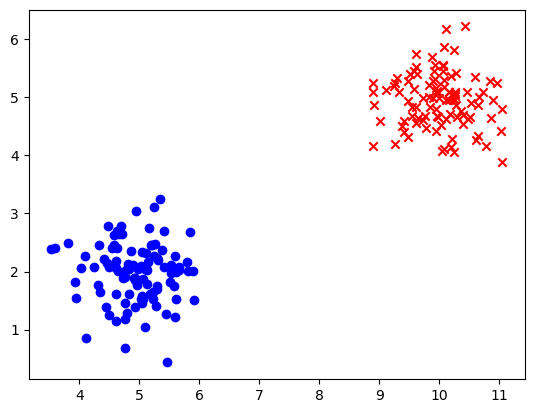

In [75]:
import matplotlib.pyplot as plt
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')

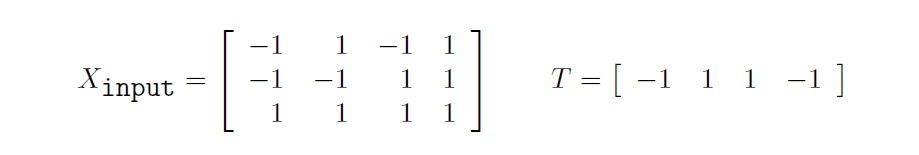

In [76]:
dataset = np.hstack((a,b))
dataset[:,:5], dataset.shape

(array([[5.04900015, 4.86571716, 4.46022615, 4.60903062, 4.77091922],
        [1.57804345, 2.36040222, 2.14338627, 1.62066887, 1.9083804 ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 (3, 200))

In [77]:
dataset

array([[ 5.04900015,  4.86571716,  4.46022615,  4.60903062,  4.77091922,
         4.49859849,  5.45776305,  5.4062711 ,  4.03550148,  5.24531813,
         3.59733793,  4.3145757 ,  5.51248892,  5.60177731,  4.63530538,
         5.66818404,  4.7108013 ,  3.80880159,  5.05312382,  4.75645076,
         5.1505345 ,  5.13453793,  5.3544823 ,  5.25098796,  4.77396307,
         4.54440531,  5.37600815,  5.23655535,  5.12159823,  3.93561699,
         4.76385025,  5.11736182,  4.92446267,  4.69869169,  4.82518596,
         5.26102279,  5.52565529,  4.61774173,  4.763475  ,  5.62114254,
         5.02632137,  4.80789035,  4.25211738,  5.02155837,  5.29255115,
         5.90052944,  4.82948537,  4.49309076,  5.0388787 ,  4.93829576,
         4.35145048,  5.31113829,  4.48349878,  4.32549203,  4.95597559,
         5.52883503,  4.40695936,  4.92755274,  4.62858367,  5.65476113,
         5.07006321,  5.29240326,  4.73436583,  5.83989591,  5.0700201 ,
         5.42110578,  5.29481219,  5.58660842,  4.6

In [78]:
# shuffling the dataset horizontally...
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[4.95597559, 9.93712967, 5.62114254, 5.45776305, 9.60930791],
       [1.77253999, 5.31175289, 1.99125325, 0.43568626, 5.51037367],
       [0.        , 1.        , 0.        , 0.        , 1.        ]])

In [79]:
dataset = np.vstack((np.ones(2*n), dataset))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [4.95597559, 9.93712967, 5.62114254, 5.45776305, 9.60930791],
        [1.77253999, 5.31175289, 1.99125325, 0.43568626, 5.51037367],
        [0.        , 1.        , 0.        , 0.        , 1.        ]]))

In [80]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

The weights are stored in matrix W with as many columns as the dimensionality of the input patterns and with the number of rows matching the number of the
outputs (dimensionality of the output).

----------

### Part 1
Apply and compare perceptron learning and the delta rules using either batch or sequential learning mode, similarly as in the previous exercise (p.1, section 3.1.2).

**Perceptron Learning Principle**: weights are changed whenever a pattern is misclassified

### Example (1x epoch)
--------------

1) initialize the weights

In [81]:
w0 = 0
w1 = 0.2
w2 = -0.5
W = np.array([w0, w1, w2])
W, W.shape

(array([ 0. ,  0.2, -0.5]), (3,))

2) initialize the learning rate

In [82]:
learning_rate = 0.1

In [83]:
X_train[:,:5]

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [4.95597559, 9.93712967, 5.62114254, 5.45776305, 9.60930791],
       [1.77253999, 5.31175289, 1.99125325, 0.43568626, 5.51037367]])

In [84]:
y_train[:10]

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0.])

3) compute predictions

In [85]:
prediction = W @ X_train[:,0]
print("prediction for the first sample is: {}".format(prediction))
if (prediction > 0):
    prediction = 1
else:
    prediction = 0
print("sample 1 is predicted as {}".format(prediction))

prediction for the first sample is: 0.10492512236319362
sample 1 is predicted as 1


In [86]:
predictions = np.array((W @ X_train) > 0, dtype=int)
predictions.shape, predictions[:15]

((200,), array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]))

4) compute updates

In [87]:
e_sample = y_train[0] - prediction
print("error is: {}".format(e_sample))

error is: -1.0


In [88]:
e = y_train - predictions
e.shape, e[:10]

((200,), array([-1.,  1., -1., -1.,  1., -1., -1.,  0.,  0.,  0.]))

In [89]:
X_train.shape, X_train[:, :5]

((3, 200),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [4.95597559, 9.93712967, 5.62114254, 5.45776305, 9.60930791],
        [1.77253999, 5.31175289, 1.99125325, 0.43568626, 5.51037367]]))

In [90]:
dW_sample = learning_rate * e_sample * X_train[:, 0] 
print("updates due to sample 0 are {}, {}".format(dW_sample, dW_sample.shape))

updates due to sample 0 are [-0.1        -0.49559756 -0.177254  ], (3,)


In [91]:
dW = learning_rate * (e @ X_train.T)
dW.shape, dW # should be all the updates for an epoch summed

((3,), array([ 4.9       , 72.16579997, 40.47682716]))

In [92]:
W_new = W + dW
W_new

array([ 4.9       , 72.36579997, 39.97682716])

---------

In [124]:
class PerceptronLearningClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        #print(np.array((self.W @ X) > 0, dtype=int))
        return np.array((self.W @ X) > 0, dtype=int)

    def fit(self, X, y, n_epochs):
        for i in range(0, n_epochs):
            predictions = self.predict(X)
            e = y_train - predictions
            dW = self.learning_rate * (e @ X.T)
            self.W += dW
            print("After {} epochs: {} errors".format(self.epochs, np.sum( 
                np.array(e != 0, dtype=int)
            )))
            self.epochs += 1

    def fit_one_epoch(self, X, y):
        nErrors = 0
        for i in range(0, X.shape[1]):
            prediction = np.array((self.W @ X[:,i]) > 0, dtype=int)
            e = y[i] - prediction
            if (e != 0):
                nErrors += 1
            dW = self.learning_rate * (e * X[:,i])
            self.W = self.W + dW
        print("Errors this epoch:" + str(nErrors))

In [125]:
# def perceptronLearn(old_weights, learning_rate, X, y):
#     W = old_weights
#     nErrors = 0
#     for i in range(0, X.shape[1]):
#         prediction = np.array((W @ X[:,i]) > 0, dtype=int)
#         e = y[i] - prediction

#         if (e != 0):
#             nErrors += 1

#         dW = learning_rate * (e * X[:,i])
#         W += dW
#     return W

In [126]:
p1 = PerceptronLearningClassifier(0.1)

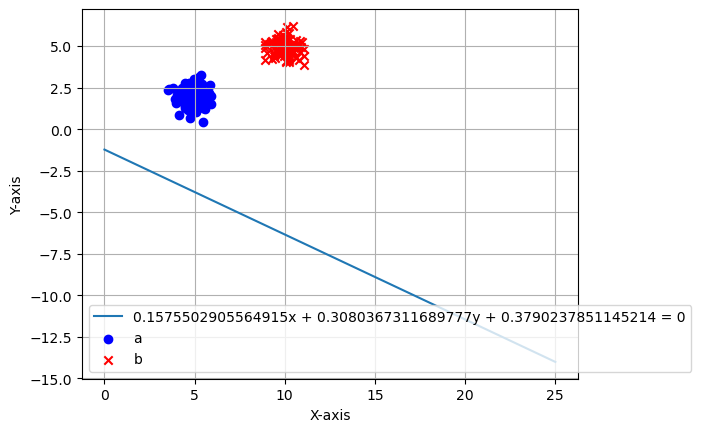

[0.37902379 0.15755029 0.30803673]


In [127]:
x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

After 200 epochs: 2 errors
After 201 epochs: 1 errors
After 202 epochs: 2 errors
After 203 epochs: 2 errors
After 204 epochs: 1 errors
After 205 epochs: 2 errors
After 206 epochs: 1 errors
After 207 epochs: 2 errors
After 208 epochs: 1 errors
After 209 epochs: 2 errors
After 210 epochs: 1 errors
After 211 epochs: 2 errors
After 212 epochs: 1 errors
After 213 epochs: 2 errors
After 214 epochs: 1 errors
After 215 epochs: 2 errors
After 216 epochs: 1 errors
After 217 epochs: 2 errors
After 218 epochs: 1 errors
After 219 epochs: 1 errors
After 220 epochs: 1 errors
After 221 epochs: 2 errors
After 222 epochs: 1 errors
After 223 epochs: 2 errors
After 224 epochs: 1 errors
After 225 epochs: 2 errors
After 226 epochs: 1 errors
After 227 epochs: 2 errors
After 228 epochs: 1 errors
After 229 epochs: 1 errors
After 230 epochs: 1 errors
After 231 epochs: 1 errors
After 232 epochs: 1 errors
After 233 epochs: 1 errors
After 234 epochs: 1 errors
After 235 epochs: 1 errors
After 236 epochs: 1 errors
A

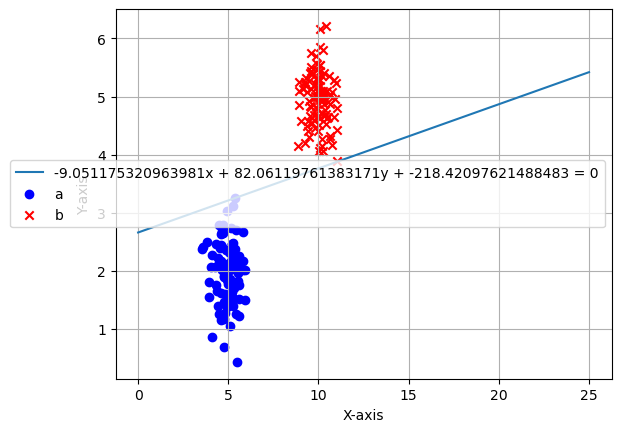

[-218.42097621   -9.05117532   82.06119761]


In [132]:
p1.fit(X_train, y_train, 50)

x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)